# Inputs

In [1]:
from fdm import Explicit, HeatSource, Bar
import numpy as np

# Bar properties
Dirichlet_boundary = [200, None] # [T1, T2] use float for Dirichlet boundary else None
Neumann_boundary = [None, True] # [dT1, dT2] use True for Neumann boundary else None
T_interior = 50
length = 0.1
num_nodes = 51
k = 237
rho = 2700
c = 897
alpha = np.sqrt(rho * c / k)

# heat source properties
q_value = 3e7
source_type = "sinusoidal" # "constant", "triangular_symmetric", "gaussian"
point_index = num_nodes/2
peak_position = length/4
frequency = 4
std = 0.02

# solver properties
max_iteration = 5000
dt = 0.03
error = 1e-6
is_analytical = False

# plotting
plot_speed = 75
bar_height = 50
num_text = 5
save_plot = True

# Grid initialization

In [2]:
bar=Bar(length = length, 
        num_nodes = num_nodes, 
        k = k, 
        T_interior = T_interior, 
        dirichlet_boundary = Dirichlet_boundary,
        neumann_boundary = Neumann_boundary,
        alpha = alpha)

analytical_grid = bar.make_grid()
numerical_grid=bar.make_grid()
print(numerical_grid)

Grid with 51 nodes, dx=0.002, nx=51, T_history={0: {0: [200, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]}}


# Heat source initialization

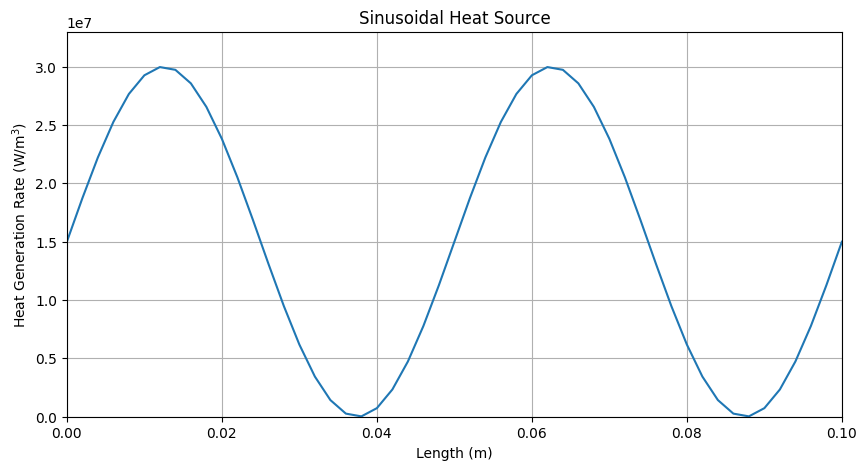

In [3]:
heat_source=HeatSource(numerical_grid, 
                       source_type = source_type, 
                       std_dev = std,
                       source_value = q_value, 
                       point_index=int(point_index),
                       source_position = peak_position,
                       frequency=frequency)

heat_source.plot()

# Solution

## Analytical Solution

In [4]:
if is_analytical:
    from fdm import AnalyticalSolution

    analytical_solution = AnalyticalSolution(grid = analytical_grid, 
                                            bar = bar,
                                            T_interior = T_interior, 
                                            heat_source = heat_source)
    analytical_solution.solve(verbose = True)
    bar.set_analytical_grid(analytical_solution.grid)

    analytical_solution.plot()

## Explicit Solver

In [5]:
explicit = Explicit(grid = numerical_grid, 
                  dt = dt, 
                  error = error, 
                  max_iteration = max_iteration, 
                  heat_source = heat_source)

explicit.solve(verbose = True)
bar.set_numerical_grid(explicit.grid)

Solving...


100%|██████████| 4999/4999 [00:06<00:00, 741.09it/s, error=1.22e-6] 


# Plotting

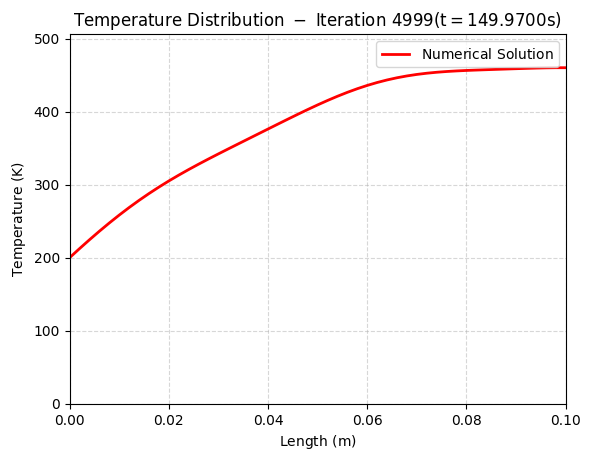

In [6]:
bar.plot_1d(plot_speed = 100, analytical_solution = is_analytical)

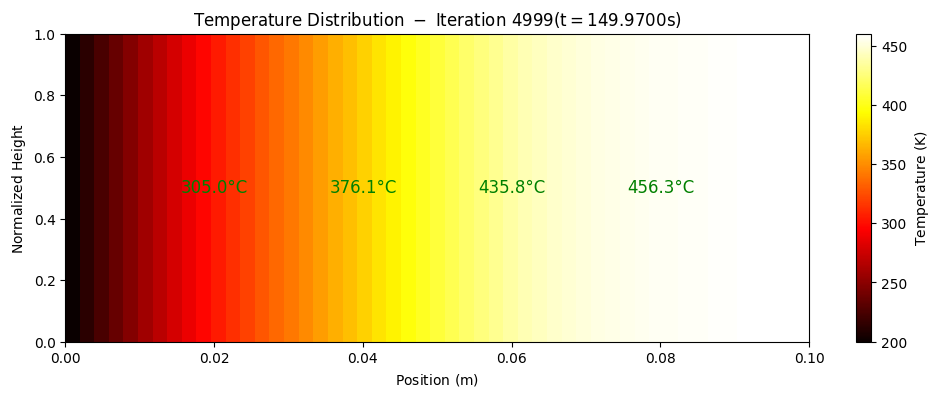

In [7]:
bar.plot_2d(plot_speed = 500, height = bar_height, num_text = num_text)